Programming exercise 1: Manuel, Niclas, Veli <br>
This code approximates the solution to the two dimensional Poisson problem by discretizing:
\begin{align}
-\Delta u & = f \; in \; \Omega = (0,1)^2\\
u & = 0 \; on \; \partial \Omega
\end{align}
First, we write a function that gives back the sparse matrix of size $(n-1)^2 \times (n-1)^2$ which we will need to solve to get the approximate solution of the Poisson problem with dirichlet boundary conditions.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, isspmatrix_csr
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D 
import scipy 
import time

def A_matrix(n):
    if n<=1:#check if n is bigger 1, throw error if not
        return print("Error: Input has to be an integer n>1")
    else:
        #nb=[-1]*(n-1) alternative but slower way in this case 
        nb = [-1 for i in range(n-1)] #list of length n-1 filled with -1, since we use it twice
        data = np.array([[2]*(n-1), nb, nb])#diagonal entries
        diags = np.array([0, -1, 1])#on which diagonals the entries should be put
        del nb #since we dont use nb anymore 
        L=scipy.sparse.spdiags(data, diags, n-1, n-1)
        A=scipy.sparse.kronsum(L,L)
        A=n*n*A
        return A
    
#Example calculation for n=4:
print("This is the resulting matrix:\n", A_matrix(4).toarray())
#This is the resulting matrix:\n", .toarray()

This is the resulting matrix:
 [[ 64 -16   0 -16   0   0   0   0   0]
 [-16  64 -16   0 -16   0   0   0   0]
 [  0 -16  64   0   0 -16   0   0   0]
 [-16   0   0  64 -16   0 -16   0   0]
 [  0 -16   0 -16  64 -16   0 -16   0]
 [  0   0 -16   0 -16  64   0   0 -16]
 [  0   0   0 -16   0   0  64 -16   0]
 [  0   0   0   0 -16   0 -16  64 -16]
 [  0   0   0   0   0 -16   0 -16  64]]


Now we implement a jacobi iteration to solve the system Au=b with:
\begin{align}
u^{(k+1)} = u^{(k)} + D^{-1} (b-Au^{(k)})
\end{align}
with stopping criterion $\lVert u^{(k+1)} - u^{(k)}\rVert < \epsilon$ for $\epsilon >0$.

In [2]:
def jacobi_iteration(A,u1,b1,e,n):
    D=(1/(4*n*n)*scipy.sparse.eye((n-1)*(n-1)))#inverse diagonal matrix
    while True:
        q=A.dot(u1)
        #k=len(q)
        #q=np.reshape(q,(k,1))
        r=b1-q
        v= D.dot(r) + u1
        if LA.norm(v-u1)<e:#if difference between steps is small, end
            return v
        u1=v

Now we want to approximately solve the example $f(x,y)=5\pi^2sin(2\pi x)sin(\pi y)$.

(array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       ],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667],
       [0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
        0.83333333],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]]), array([[0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
        1.        ],
       [0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
        1.        ],
       [0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
        1.        ],
       [0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
        1.        ],
       [0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
        1.        ],
       [0.16666667

       [0.015625, 0.03125 , 0.046875, ..., 0.953125, 0.96875 , 0.984375]]))
[0.015625 0.015625 0.03125  ... 0.984375 0.984375 0.984375]
[[0.015625 0.015625]
 [0.03125  0.015625]
 [0.046875 0.015625]
 ...
 [0.953125 0.984375]
 [0.96875  0.984375]
 [0.984375 0.984375]]
(array([[0.0078125, 0.0078125, 0.0078125, ..., 0.0078125, 0.0078125,
        0.0078125],
       [0.015625 , 0.015625 , 0.015625 , ..., 0.015625 , 0.015625 ,
        0.015625 ],
       [0.0234375, 0.0234375, 0.0234375, ..., 0.0234375, 0.0234375,
        0.0234375],
       ...,
       [0.9765625, 0.9765625, 0.9765625, ..., 0.9765625, 0.9765625,
        0.9765625],
       [0.984375 , 0.984375 , 0.984375 , ..., 0.984375 , 0.984375 ,
        0.984375 ],
       [0.9921875, 0.9921875, 0.9921875, ..., 0.9921875, 0.9921875,
        0.9921875]]), array([[0.0078125, 0.015625 , 0.0234375, ..., 0.9765625, 0.984375 ,
        0.9921875],
       [0.0078125, 0.015625 , 0.0234375, ..., 0.9765625, 0.984375 ,
        0.9921875],
       [0.007

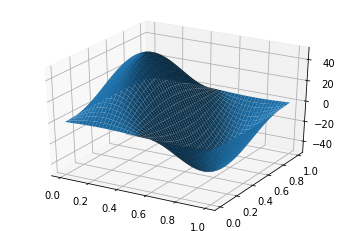

In [25]:
def f(x,y):#the function for which we want to solve the Poisson equation
    return 5*np.pi*np.pi*np.sin(2*np.pi*x)*np.sin(np.pi*y)

def u(n):#gives start vector [00...00] of right size back
    k=(n-1)*(n-1)
    u1=[0]*k
    u1=np.reshape(u1,(k,1))
    return u1

def grid_ij(n):#grid with ij indexing
    x=np.arange(1/n, 1, 1/n)
    y=np.arange(1/n, 1, 1/n)
    XX,YY=np.meshgrid(x, y, sparse=False, indexing='ij')
    return XX,YY

def grid_xy(n):#grid with coordinate like indexing
    x=np.arange(1/n, 1, 1/n)
    y=np.arange(1/n, 1, 1/n)
    XX,YY=np.meshgrid(x, y, sparse=False, indexing='xy')
    return XX,YY

def b(n):#calculates vector of values of f(x,y)
    z=grid_ij(n)
    print(z)
    l=len(z[0])
    a=np.reshape(z,l*l*2, order='F')
    print(a)
    a=a.reshape((l*l,2))
    print(a)
    result=f(a[:,:1],a[:,1:2])
    return result

def solve(n):#applies jacobi iteration
    A=A_matrix(n)
    b1=b(n)
    u1=u(n)
    e=1e-10#tolerance
    return jacobi_iteration(A,u1,b1,e,n)
b(6)
n_list=[8,16,32,64,128]                   #different grid sizes for calculations
approx_result = [solve(x) for x in n_list]#calculating different approximations
x=np.arange(1/128, 1, 1/128)
y=np.arange(1/128, 1, 1/128)
XX,YY=np.meshgrid(x, y, sparse=False, indexing='xy')
ZZ=b1.reshape(np.array(grid_ij(128)[0]).shape)#function values on grid points in right format
#Axes3D.plot_surface(XX,YY,ZZ)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(XX, YY, ZZ)
#scipy.sparse.linalg.spsolve(A_matrix(128), b(128)) for comparing results, works as intended

This is the surface plot of our approximated solution.

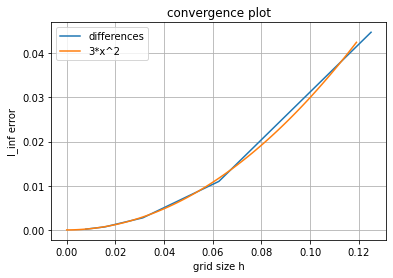

In [62]:
def exact_sol(x,y):#analytical solution to the poisson equation for the example
    return np.sin(2*np.pi*x)*np.sin(np.pi*y)

def apply_exact_sol(n):#calculates vector of values of exact_sol(x,y)
    z=grid_ij(n)
    l=len(z[0])
    a=np.reshape(z,l*l*2, order='F')
    a=a.reshape((l*l,2))
    result=exact_sol(a[:,:1],a[:,1:2])
    return result

numb=np.arange(0., 0.12,0.001)
h_list=[1/n_list[i] for i in range(5)]
exact_result = [apply_exact_sol(x) for x in n_list]
#print(exact_result[4])
max_diff=[np.amax(abs(approx_result[i]-exact_result[i])) for i in range(5)]
plt.xlabel('grid size h')
plt.ylabel('l_inf error')
plt.title('convergence plot')
plt.grid(True)
plt.plot(h_list,max_diff,label="differences")
plt.plot(numb,3*numb**2,label="3*x^2")
plt.legend()
plt.show()